#### Imports

In [17]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [18]:
data = pd.read_excel('Data/bikes_market_size.xlsx', sheet_name='Data', skiprows=4)
data = data.iloc[:, [1, 2]]  
data.columns = ['Year', 'Size']
data = data[data['Year'] <= 2024]
print(data)

   Year   Size
0  2015   6.43
1  2016   7.98
2  2017  10.57
3  2018  14.45
4  2019  18.38
5  2020  27.53
6  2021  30.93
7  2022  32.14
8  2023  34.25
9  2024  35.96


In [19]:
### BASS MODEL
def bass_model(t, p, q, M):
    """Bass Diffusion Model"""
    return (M * (p + q) ** 2 * np.exp(-(p + q) * t)) / (p + q * np.exp(-(p + q) * t)) ** 2

In [20]:
### NORMALIZING DATA
t = data['Year'].values - data['Year'].min() 
adopters = data['Size'].values 
print("Years:", t)
print("Market Size:", adopters)


Years: [0 1 2 3 4 5 6 7 8 9]
Market Size: [ 6.43  7.98 10.57 14.45 18.38 27.53 30.93 32.14 34.25 35.96]


In [21]:
params, _ = opt.curve_fit(bass_model, t, adopters, maxfev=10000)
p, q, M = params
print(f"Estimated Bass Model Parameters:\n p = {p:.4f}, q = {q:.4f}, M = {M:.0f}")

t_future = np.arange(min(t), max(t) + 5)  
predicted_adopters = bass_model(t_future, p, q, M)

Estimated Bass Model Parameters:
 p = -0.3616, q = -0.0160, M = 6


/var/folders/s2/hx3jt30j4tq7xdf2jp45xgph0000gn/T/ipykernel_13644/2765965346.py:4: RuntimeWarning: overflow encountered in exp
  return (M * (p + q) ** 2 * np.exp(-(p + q) * t)) / (p + q * np.exp(-(p + q) * t)) ** 2
/var/folders/s2/hx3jt30j4tq7xdf2jp45xgph0000gn/T/ipykernel_13644/2765965346.py:4: RuntimeWarning: overflow encountered in square
  return (M * (p + q) ** 2 * np.exp(-(p + q) * t)) / (p + q * np.exp(-(p + q) * t)) ** 2
/var/folders/s2/hx3jt30j4tq7xdf2jp45xgph0000gn/T/ipykernel_13644/2765965346.py:4: RuntimeWarning: invalid value encountered in divide
  return (M * (p + q) ** 2 * np.exp(-(p + q) * t)) / (p + q * np.exp(-(p + q) * t)) ** 2


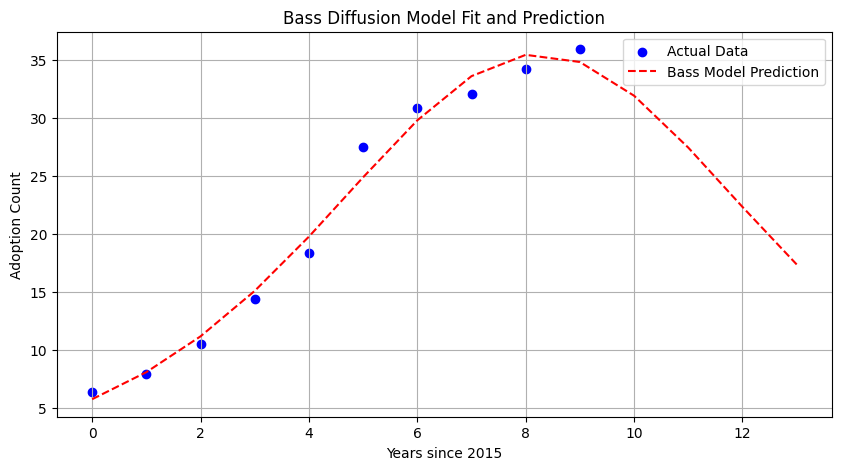

In [22]:
# Plot Actual vs. Predicted
plt.figure(figsize=(10, 5))
plt.scatter(t, adopters, label="Actual Data", color="blue")
plt.plot(t_future, predicted_adopters, label="Bass Model Prediction", linestyle="--", color="red")

# Labels and title
plt.xlabel("Years since " + str(data['Year'].min()))
plt.ylabel("Adoption Count")
plt.title("Bass Diffusion Model Fit and Prediction")
plt.legend()
plt.grid()

# Show plot
plt.show()

In [23]:
years_future = np.arange(0, 15)
predicted = bass_model(years_future, p, q, M)

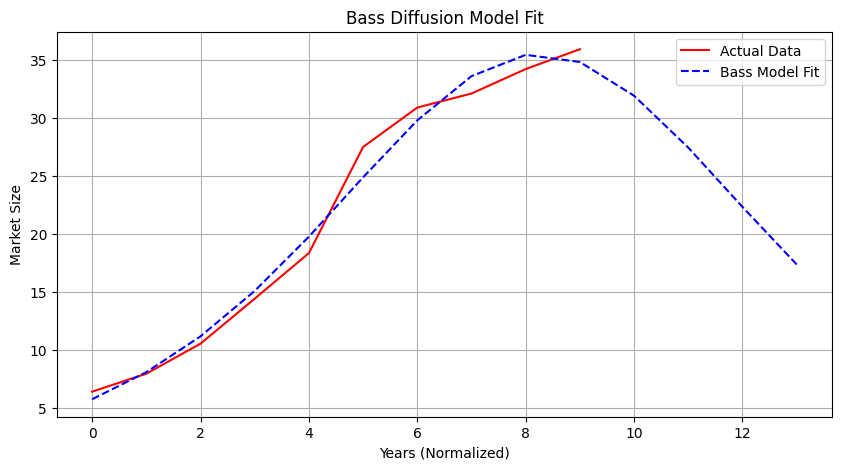

In [24]:
### Ploting Predicted Data
t_future = np.arange(min(t), max(t) + 5)  
predicted_adopters = bass_model(t_future, p, q, M)


plt.figure(figsize=(10, 5))
plt.plot(t, adopters, label="Actual Data", color="red")
plt.plot(t_future, predicted_adopters, label="Bass Model Fit", linestyle="--", color="blue")


plt.xlabel("Years (Normalized)")
plt.ylabel("Market Size")
plt.title("Bass Diffusion Model Fit")
plt.legend()
plt.grid()

plt.show()
